In [139]:
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
# Column Sort Function
def sort_col(df, col_name: str):
    return df.sort_values(by=[col_name])

            Lab  Experimenter   Compound Concentration Units      Species  \
0      DRISCOLL            16   CTRL_H2O            x0    μM  C. BRIGGSAE   
1      DRISCOLL            16   CTRL_H2O            x0    μM  C. BRIGGSAE   
2      DRISCOLL            16   CTRL_H2O            x0    μM  C. BRIGGSAE   
3      DRISCOLL            16   CTRL_H2O            x0    μM  C. BRIGGSAE   
4      DRISCOLL            16   CTRL_H2O            x0    μM  C. BRIGGSAE   
...         ...           ...        ...           ...   ...          ...   
31283  PHILLIPS             9  METFORMIN        x70000    μM   C. ELEGANS   
31284  PHILLIPS             9  METFORMIN        x70000    μM   C. ELEGANS   
31285  PHILLIPS             9  METFORMIN        x70000    μM   C. ELEGANS   
31286  PHILLIPS             9  METFORMIN        x70000    μM   C. ELEGANS   
31287  PHILLIPS             9  METFORMIN        x70000    μM   C. ELEGANS   

      Strain Thaw Date Start Date        Plate_Title   PlateID  Age at Deat

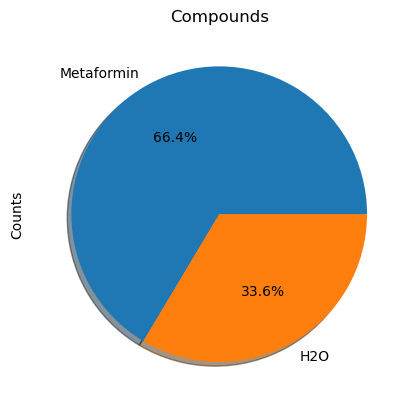

In [141]:
# Compounds Pie Chart
df_metfo = pd.read_csv("/Users/phillipscitp/Desktop/CITP-Portal/metfo_lifespan-Table 1.csv")
print(df_metfo)
comps = sort_col(df_metfo, "Compound").loc[:, "Compound"]
metaformin = 0
h20 = 0
for comp in comps:
    if comp == "METFORMIN":
        metaformin += 1
for comp in comps:
    if comp == "CTRL_H2O":
        h20 += 1
dc_comps = {"Compounds": ["Metaformin", "H2O"], "Counts": [metaformin, h20]}
df_comps = pd.DataFrame(dc_comps, index=["Metaformin", "H2O"])
print(df_comps)
df_comps.plot.pie(y='Counts', title="Compounds", legend=False, \
                    autopct='%1.1f%%', explode=(0, 0), \
                    shadow=True, startangle=0) #(kind='pie', y="Percentages", figsize=(5, 5))
plt.show()

<AxesSubplot:title={'center':'Strain Quantites'}, xlabel='Strains'>

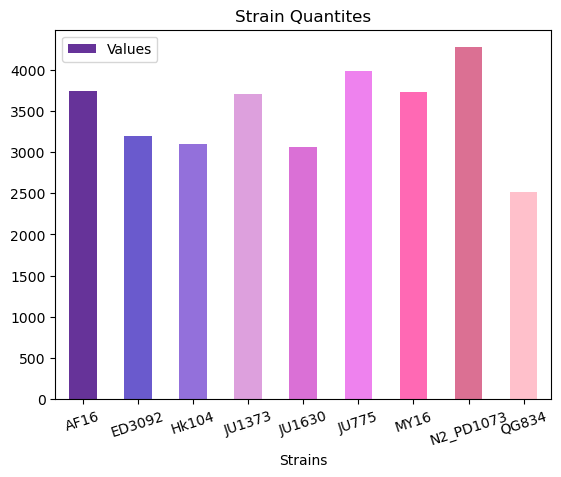

In [142]:
# Strains Pie Chart
strains = sort_col(df_metfo, "Strain")
#print(strains)
unique_strains = []
for strain in strains["Strain"]:
    if strain not in unique_strains:
        unique_strains.append(strain)
# print(unique_strains)
strains_df = strains.groupby("Strain").size()
strains_df = strains_df.to_frame()
strains = ["AF16", "ED3092", "Hk104", "JU1373", "JU1630", "JU775", "MY16", "N2_PD1073", "QG834"]
vals = [3735, 3199, 3093, 3703, 3058, 3985, 3726, 4269, 2520]
dc = {"Strains": strains, "Values": vals}
df_strains = pd.DataFrame(dc)
df_strains.plot(kind="bar", title="Strain Quantites", x="Strains", y="Values", rot=18, color=["rebeccapurple", 
                "slateblue", "mediumpurple", "plum", "orchid", "violet", "hotpink","palevioletred", "pink"])


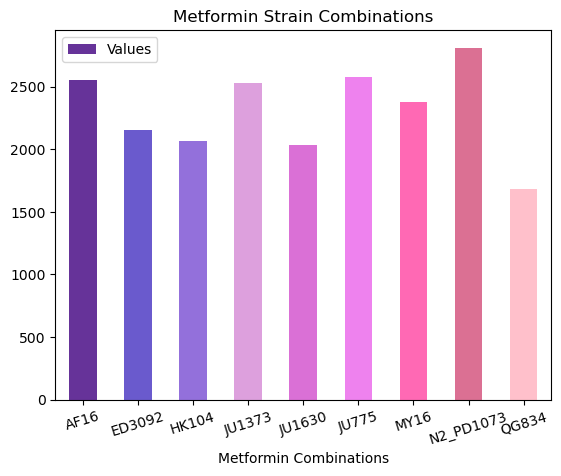

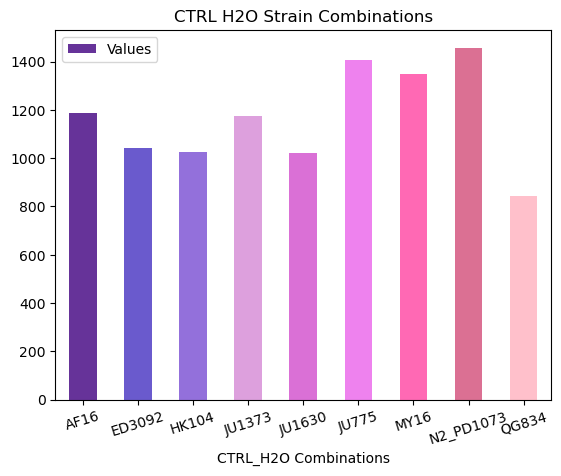

In [143]:
# Compound Strain Combos
# print(df_metfo[["Strain", "Compound"]])
# print(df_metfo.groupby(["Strain", "Compound"]).size())
# There are 18 combinations
combos_met = ["AF16", "ED3092", "HK104", 
          "JU1373", "JU1630", "JU775", 
           "MY16", "N2_PD1073", "QG834"]
combos_h2o = ["AF16", "ED3092", "HK104", 
              "JU1373", "JU1630", "JU775", 
              "MY16", "N2_PD1073", "QG834"]
vals_met = [2549, 2157, 2068, 2528, 2035, 2578, 2379, 2811, 1679]
vals_h2o = [1186, 1042, 1025, 1175, 1023, 1407, 1347, 1458, 841]
dc_h2o = {"CTRL_H2O Combinations": combos_h2o, "Values": vals_h2o}
dc_met ={"Metformin Combinations": combos_met, "Values": vals_met}
df_combos_met = pd.DataFrame(dc_met)
df_combos_h2o = pd.DataFrame(dc_h2o)
bar_met = df_combos_met.plot(kind="bar", title="Metformin Strain Combinations", x="Metformin Combinations", y="Values", rot=17, 
                             color=["rebeccapurple", "slateblue", "mediumpurple", "plum", "orchid", "violet", "hotpink","palevioletred", "pink"])
bar_h2o = df_combos_h2o.plot(kind="bar", title="CTRL H2O Strain Combinations", x="CTRL_H2O Combinations", y="Values", rot=17, 
                             color=["rebeccapurple", "slateblue", "mediumpurple", "plum", "orchid", "violet", "hotpink","palevioletred", "pink"])


In [144]:
# Webpage PDF
# color pallete webpage: https://matplotlib.org/stable/gallery/color/named_colors.html
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('strain_and_compound_visuals.pdf') as pdf:
    df_strains.plot(kind="bar", title="Strain Quantites", x="Strains", y="Values", rot=18, 
                    color=["rebeccapurple", "slateblue", "mediumpurple", "plum", "orchid", "violet", "hotpink","palevioletred", "pink"])
    pdf.savefig()
    plt.close()

    df_combos_met.plot(kind="bar", title="Metformin Strain Combinations", x="Metformin Combinations", y="Values", rot=17, 
                       color=["rebeccapurple", "slateblue", "mediumpurple", "plum", "orchid", "violet", "hotpink","palevioletred", "pink"])
    pdf.savefig()
    plt.close()

    df_combos_h2o.plot(kind="bar", title="CTRL H2O Strain Combinations", x="CTRL_H2O Combinations", y="Values", rot=17, 
                       color=["rebeccapurple", "slateblue", "mediumpurple", "plum", "orchid", "violet", "hotpink","palevioletred", "pink"])
    pdf.savefig()
    plt.close()